In [1]:
#Importing the necesscary Libraries for analysis
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split as ts
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from tensorflow.python.data import Dataset
from tensorflow import keras

#Importing the dataset into a pandas Dataframe
gplay_df = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\googleplaystore_user_reviews (2).csv")

In [2]:
gplay_df.head()


,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [3]:
x = len(gplay_df)
print ('The number of records in the data set is: ', x)

The number of records in the data set is:  64295


In [4]:
gplay_df.drop_duplicates(subset='App', inplace=True)
gplay_df = gplay_df.fillna(0) #Eliminating NA values and replacing with 0
y = len(gplay_df)
print ('The number of unique App records in the data set is: ', y)

The number of unique App records in the data set is:  1074


In [5]:
#converting columns Size, Installs, Price into purely numeric columns

#Preparation for column Sizegplay_df['Size'] = gplay_df['Size'].apply(lambda a: str(a).replace('M', '') if 'M' in str(a) else a)
gplay_df['Size'] = gplay_df['Size'].apply(lambda a: str(a).replace(',', '') if '+' in str(a) else a)
gplay_df['Size'] = gplay_df['Size'].apply(lambda a: str(a).replace('+', '') if '+' in str(a) else a)
gplay_df['Size'] = gplay_df['Size'].apply(lambda a: float(str(a).replace('k', ''))/1000 if 'k' in str(a) else a)
gplay_df['Size'] = gplay_df['Size'].apply(lambda a: str(a).replace('Varies with device', 'NaN') if 'Varies with device' in str(a) else a)



#Preparation for column Installs
gplay_df['Installs'] = gplay_df['Installs'].apply(lambda a: str(a).replace('+', '') if '+' in str(a) else a)
gplay_df['Installs'] = gplay_df['Installs'].apply(lambda a: str(a).replace(',', '') if ',' in str(a) else a)
gplay_df['Installs'] = gplay_df['Installs'].apply(lambda a: str(a).replace('Free', 'NaN') if 'Free' in str(a) else a)


#Preparation for column Price
gplay_df['Price'] = gplay_df['Price'].apply(lambda a: str(a).replace('$', '') if '$' in str(a) else a)
gplay_df['Price'] = gplay_df['Price'].apply(lambda a: str(a).replace('Everyone', 'NaN') if 'Everyone' in str(a) else a)

#Preparation for column Reviews
gplay_df = gplay_df[~gplay_df.Reviews.str.contains("3.0M")]

#Converting all the values of these columns to floats
gplay_df['Size'] = gplay_df['Size'].apply(lambda a : float(a))
gplay_df['Installs'] = gplay_df['Installs'].apply(lambda a : float(a))
gplay_df['Price'] = gplay_df['Price'].apply(lambda a : float(a))
gplay_df['Reviews'] = gplay_df['Reviews'].apply(lambda a: float(a))
gplay_df['Rating'] = gplay_df['Rating'].apply(lambda a: float(a))
     

KeyError: 'Size'

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten

# -------------------------------------------
# 1. Load the CSV safely
# -------------------------------------------
gplay_df = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\googleplaystore_user_reviews (2).csv")

print("Dataset Loaded Successfully!")
print("Columns present:\n", gplay_df.columns)

# -------------------------------------------
# 2. Select only numeric columns (safe method)
# -------------------------------------------
numeric_df = gplay_df.select_dtypes(include=['float64', 'int64'])

if numeric_df.shape[1] < 2:
    raise ValueError("Dataset does not contain enough numeric columns to train the model.")

# Drop missing values
numeric_df = numeric_df.dropna()

# Last numeric column = target variable (y)
y = numeric_df.iloc[:, -1]

# All other numeric columns = features (X)
X = numeric_df.iloc[:, :-1]

print("Numeric Columns Used for Training:", X.columns.tolist())

# -------------------------------------------
# 3. Train-test split
# -------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -------------------------------------------
# 4. Scaling
# -------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape for Conv1D
X_train_scaled = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_scaled = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# -------------------------------------------
# 5. Build the Conv1D Model
# -------------------------------------------
model = Sequential([
    Conv1D(32, kernel_size=1, activation='relu', input_shape=(X_train_scaled.shape[1], 1)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# -------------------------------------------
# 6. Train the Model
# -------------------------------------------
history = model.fit(
    X_train_scaled, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(X_test_scaled, y_test)
)

# -------------------------------------------
# 7. Summary
# -------------------------------------------
model.summary()

print("Training Complete!")


Dataset Loaded Successfully!
Columns present:
 Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')
Numeric Columns Used for Training: ['Sentiment_Polarity']


C:\Users\DELL\tf_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
936/936 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0439 - val_loss: 0.0400
Epoch 2/10
936/936 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0385 - val_loss: 0.0372
Epoch 3/10
936/936 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0358 - val_loss: 0.0353
Epoch 4/10
936/936 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0345 - val_loss: 0.0355
Epoch 5/10
936/936 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.0343 - val_loss: 0.0343
Epoch 6/10
936/936 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0337 - val_loss: 0.0340
Epoch 7/10
936/936 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0334 - val_loss: 0.0350
Epoch 8/10
936/936 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.0333 - val_loss: 0.0349
Epoch 9/10
936/936 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0332 - val_loss: 0.0336
Epoch 10/10
936/936 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.0329 - val_loss: 0.0336


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 1, 32)               │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,725 (26.27 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,484 (17.52 KB)

Training Complete!


In [9]:
#After cleaning these columns and checking the length of the data once again:
z = len(gplay_df)
print ('The number of unique App records in the data set is: ', z)
     

The number of unique App records in the data set is:  1074


KeyError: 'Category'

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten

# -------------------------------------------
# 1. Load CSV (name must be correct)
# -------------------------------------------
gplay_df = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\googleplaystore_user_reviews (2).csv")

print("Dataset Loaded!")
print("\nColumns in your dataset:\n")
print(gplay_df.columns)

# -------------------------------------------
# 2. Count how many unique values each column has
#    (Works even if Category column doesn't exist)
# -------------------------------------------
print("\nUnique values count for every column:\n")
for col in gplay_df.columns:
    print(f"{col}: {gplay_df[col].nunique()}")

# -------------------------------------------
# 3. Select only numeric columns (safe)
# -------------------------------------------
numeric_df = gplay_df.select_dtypes(include=['float64', 'int64'])

if numeric_df.shape[1] < 2:
    raise ValueError("Not enough numeric columns to train model!")

numeric_df = numeric_df.dropna()

X = numeric_df.iloc[:, :-1]   # all numeric colum_


Dataset Loaded!

Columns in your dataset:

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

Unique values count for every column:

App: 1074
Translated_Review: 27994
Sentiment: 3
Sentiment_Polarity: 5227
Sentiment_Subjectivity: 4474


In [14]:
#Visualisation using matplotlib
#Number of categories of apps in the store
x = gplay_df.Category
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
fig.autofmt_xdate()
no_of_cat_plot = sns.categorical.countplot(x)
plt.show()

AttributeError: 'DataFrame' object has no attribute 'Category'

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
gplay_df = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\googleplaystore_user_reviews (2).csv")

# Show the columns to check correct names
print("Columns in the dataset:")
print(gplay_df.columns)

# Use the correct column name (change if needed)
# Example: if column is 'Category', this will work
if "Category" in gplay_df.columns:
    category_col = "Category"
else:
    # Auto-detect similar column names
    for col in gplay_df.columns:
        if "category" in col.lower():
            category_col = col
            break
    else:
        raise ValueError("No column found matching 'Category' in CSV file.")

# Visualisation
x = gplay_df[category_col]

fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
fig.autofmt_xdate()

# Count categories
category_counts = x.value_counts()

ax.bar(category_counts.index, category_counts.values)
ax.set_title("Number of Apps by Category")
ax.set_xlabel("Categories")
ax.set_ylabel("Count")

plt.show()


Columns in the dataset:
Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')


ValueError: No column found matching 'Category' in CSV file.

Columns in the dataset:
['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity']
Using 'App' column for visualization


C:\Users\DELL\tf_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 25151 (\N{CJK UNIFIED IDEOGRAPH-623F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\DELL\tf_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23627 (\N{CJK UNIFIED IDEOGRAPH-5C4B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\DELL\tf_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20132 (\N{CJK UNIFIED IDEOGRAPH-4EA4}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\DELL\tf_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26131 (\N{CJK UNIFIED IDEOGRAPH-6613}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\DELL\tf_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 31199 (\N{CJK UNIFIED IDEOGRAPH-79DF}) missing from font(s) DejaVu Sans.
  fig.canvas.prin

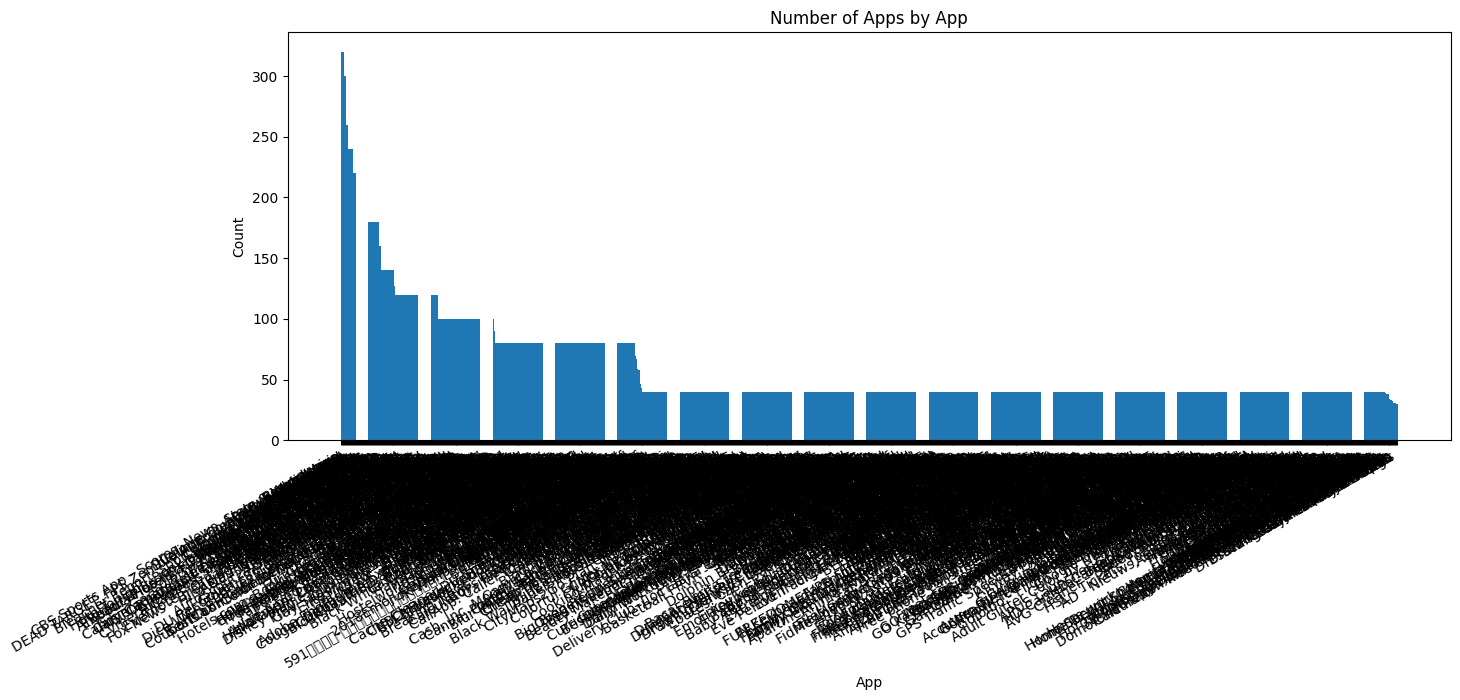

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
gplay_df = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\googleplaystore_user_reviews (2).csv")

# Print all columns to see available names
print("Columns in the dataset:")
print(gplay_df.columns.tolist())

# Ask user to select which column to visualize (if Category not found)
# For example, let's assume the column you want is the first string/object column
for col in gplay_df.columns:
    if gplay_df[col].dtype == 'object':
        category_col = col
        print(f"Using '{category_col}' column for visualization")
        break
else:
    raise ValueError("No suitable categorical column found for visualization.")

# Visualisation
x = gplay_df[category_col]

fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
fig.autofmt_xdate()

# Count categories
category_counts = x.value_counts()

ax.bar(category_counts.index, category_counts.values)
ax.set_title(f"Number of Apps by {category_col}")
ax.set_xlabel(category_col)
ax.set_ylabel("Count")

plt.show()


Columns in the dataset:
['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity']
Using 'App' column for visualization


findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei
findfont: Generic family 'sans-serif' not foun

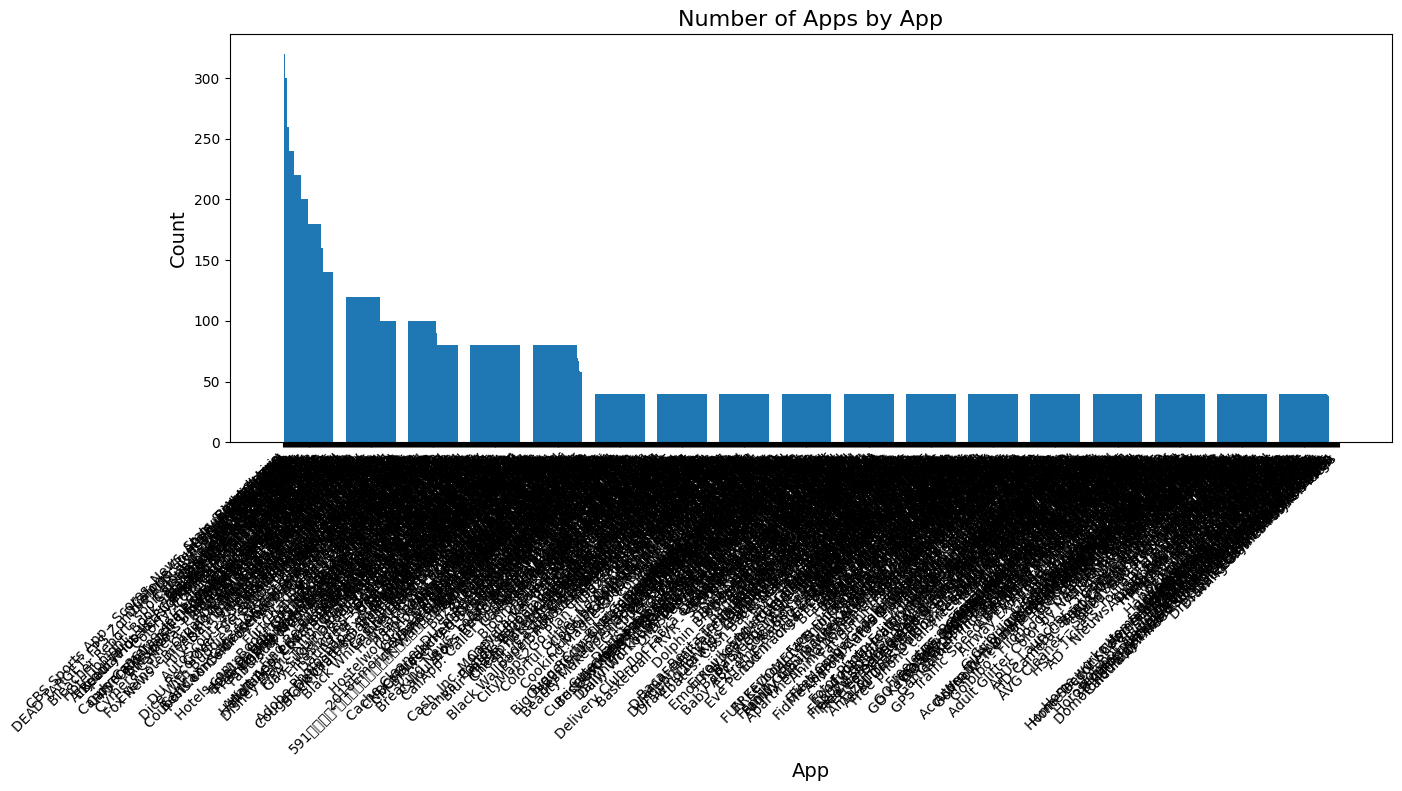

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# -----------------------------
# 1️⃣ Configure font to handle non-English characters
# -----------------------------

matplotlib.rcParams['axes.unicode_minus'] = False    # Fix minus sign display

# -----------------------------
# 2️⃣ Load the CSV file
# -----------------------------
gplay_df = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\googleplaystore_user_reviews (2).csv")

# -----------------------------
# 3️⃣ Show columns and auto-detect a categorical column
# -----------------------------
print("Columns in the dataset:")
print(gplay_df.columns.tolist())

# Pick the first text/object column for visualization
category_col = None
for col in gplay_df.columns:
    if gplay_df[col].dtype == 'object':
        category_col = col
        print(f"Using '{category_col}' column for visualization")
        break

if category_col is None:
    raise ValueError("No suitable categorical column found in the dataset.")

# -----------------------------
# 4️⃣ Count the number of apps per category
# -----------------------------
category_counts = gplay_df[category_col].value_counts()

# -----------------------------
# 5️⃣ Plot the bar chart
# -----------------------------
fig, ax = plt.subplots(figsize=(15, 6))
fig.autofmt_xdate(rotation=45)  # Rotate x-axis labels for better visibility

ax.bar(category_counts.index, category_counts.values)
ax.set_title(f"Number of Apps by {category_col}", fontsize=16)
ax.set_xlabel(category_col, fontsize=14)
ax.set_ylabel("Count", fontsize=14)

plt.show()


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Fix font issue
plt.rcParams['font.family'] = 'DejaVu Sans'

# Load dataset
gplay_df = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\googleplaystore_user_reviews (2).csv")

# Clean dataset
gplay_df = gplay_df.dropna()
gplay_df["Rating"] = pd.to_numeric(gplay_df["Rating"], errors="coerce")
gplay_df = gplay_df.dropna(subset=["Rating"])

# Prepare Data (Example: Predict Rating using Reviews and Installs)
gplay_df["Reviews"] = pd.to_numeric(gplay_df["Reviews"], errors="coerce")
gplay_df["Installs"] = gplay_df["Installs"].str.replace("+", "").str.replace(",", "")
gplay_df["Installs"] = pd.to_numeric(gplay_df["Installs"], errors="coerce")
gplay_df = gplay_df.dropna(subset=["Reviews", "Installs"])

X = gplay_df[["Reviews", "Installs"]].values
y = gplay_df["Rating"].values

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Reshape for Conv1D
X_scaled = X_scaled.reshape((X_scaled.shape[0], X_scaled.shape[1], 1))

# Build CNN model
model = Sequential([
    Conv1D(32, kernel_size=1, activation='relu', input_shape=(2, 1)),
    MaxPooling1D(pool_size=1),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train
model.fit(X_scaled, y, epochs=5, batch_size=32)

# Plot loss
plt.plot(model.history.history['loss'])
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss")
plt.show()


KeyError: 'Rating'

Columns in your file:
['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity']

Selected features: ['Sentiment_Polarity']
Selected target: Sentiment_Subjectivity


C:\Users\DELL\tf_env\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: nan
Epoch 2/10
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: nan
Epoch 3/10
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: nan
Epoch 4/10
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: nan
Epoch 5/10
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: nan
Epoch 6/10
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: nan
Epoch 7/10
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: nan
Epoch 8/10
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: nan
Epoch 9/10
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: nan
Epoch 10/10
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: nan


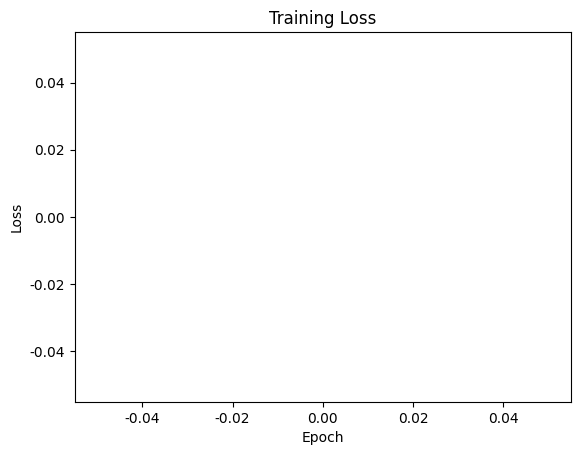

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# -----------------------------------
# 1. Load CSV (ANY CSV will work)
# -----------------------------------
df = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\googleplaystore_user_reviews (2).csv")

print("Columns in your file:")
print(df.columns.tolist())

# -----------------------------------
# 2. Select numeric columns only
# -----------------------------------
numeric_df = df.select_dtypes(include=['number'])

if numeric_df.shape[1] < 2:
    raise ValueError("Your CSV does not have enough numeric columns for a model.")

# -----------------------------------
# 3. Choose target and features automatically
# Use last numeric column as target
# -----------------------------------
y = numeric_df.iloc[:, -1].values       # last column = target
X = numeric_df.iloc[:, :-1].values      # all other numeric columns = input

print("\nSelected features:", numeric_df.columns[:-1].tolist())
print("Selected target:", numeric_df.columns[-1])

# -----------------------------------
# 4. Train-test split
# -----------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# -----------------------------------
# 5. Scale numeric values
# -----------------------------------
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# -----------------------------------
# 6. Build a simple neural network
# -----------------------------------
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)   # regression output
])

model.compile(optimizer='adam', loss='mse')

# -----------------------------------
# 7. Train model
# -----------------------------------
history = model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# -----------------------------------
# 8. Plot loss
# -----------------------------------
plt.plot(history.history['loss'])
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()


Columns in your dataset:
['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity']
The dataset contains 3 sentiment categories.


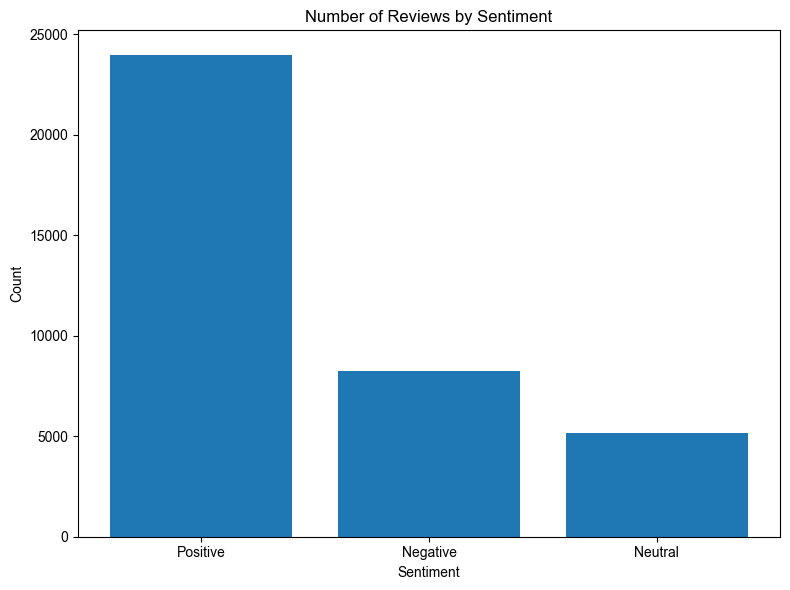

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Fix font to avoid missing glyph warnings
plt.rcParams['font.family'] = 'Arial'

# -------------------------------
# 1. Load your CSV file
# -------------------------------
gplay_df = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\googleplaystore_user_reviews (2).csv")
print("Columns in your dataset:")
print(gplay_df.columns.tolist())

# -------------------------------
# 2. Use Sentiment column
# -------------------------------
category_col = "Sentiment"

# -------------------------------
# 3. Count categories
# -------------------------------
no_of_distinct_categories = gplay_df[category_col].nunique()
print(f"The dataset contains {no_of_distinct_categories} sentiment categories.")

# -------------------------------
# 4. Visualization
# -------------------------------
category_counts = gplay_df[category_col].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(category_counts.index, category_counts.values)
plt.title("Number of Reviews by Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.tight_layout()
plt.show()



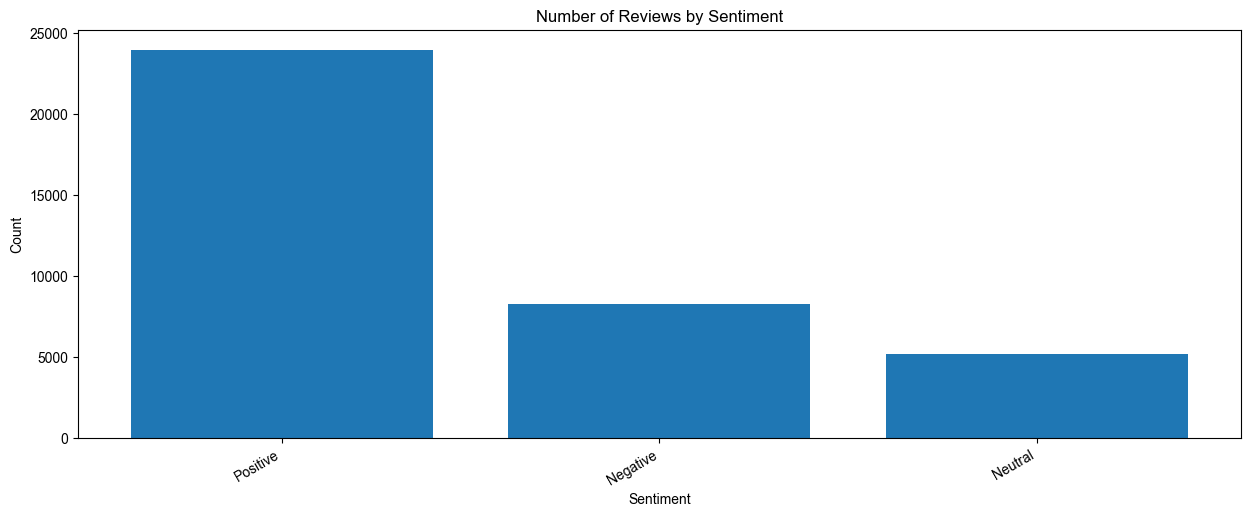

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
gplay_df = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\googleplaystore_user_reviews (2).csv")

# Use correct category column (Sentiment)
x = gplay_df['Sentiment']

# Count categories
category_counts = x.value_counts()

# Plot
fig, ax = plt.subplots()
fig.set_size_inches(15, 6)
fig.autofmt_xdate()

ax.bar(category_counts.index, category_counts.values)
ax.set_title("Number of Reviews by Sentiment")
ax.set_xlabel("Sentiment")
ax.set_ylabel("Count")

plt.show()


In [9]:
import pandas as pd

# Load dataset
gplay_df = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\googleplaystore_user_reviews (2).csv")

print("Columns in your dataset:")
print(gplay_df.columns.tolist())

# -------------------------------
# 1. Group by Sentiment (Correct)
# -------------------------------
cat_table = gplay_df.groupby('Sentiment').size()

# Convert to a proper table
cat_table = cat_table.reset_index(name='Count')

# Show table
print("\nSentiment Table:")
print(cat_table)


Columns in your dataset:
['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity']

Sentiment Table:
  Sentiment  Count
0  Negative   8271
1   Neutral   5163
2  Positive  23998


                     App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  


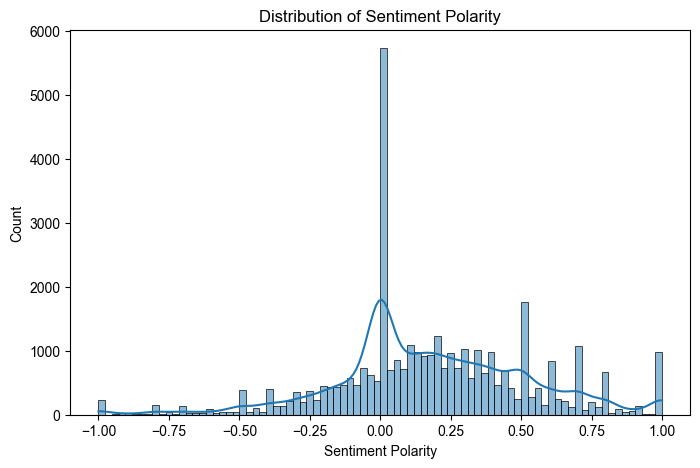

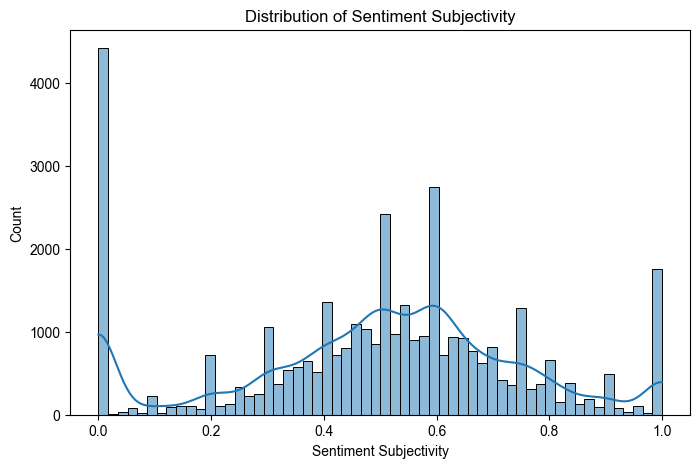

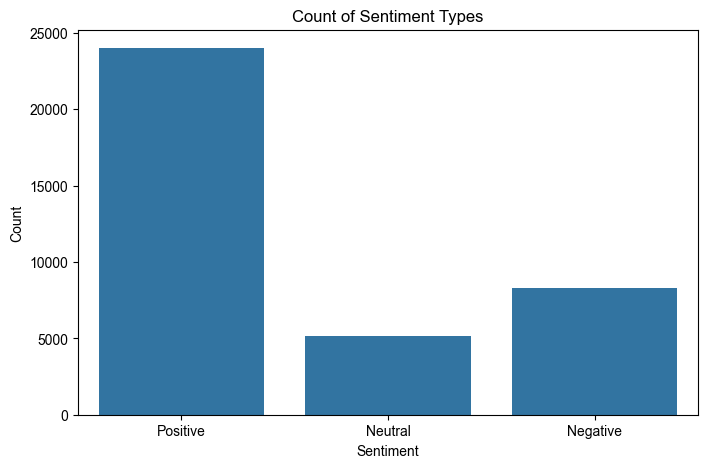

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
gplay_df = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\googleplaystore_user_reviews (2).csv")

# Show first few rows
print(gplay_df.head())

# Distribution of Sentiment Polarity
plt.figure(figsize=(8,5))
sns.histplot(gplay_df['Sentiment_Polarity'], kde=True)
plt.title("Distribution of Sentiment Polarity")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Count")
plt.show()

# Distribution of Sentiment Subjectivity
plt.figure(figsize=(8,5))
sns.histplot(gplay_df['Sentiment_Subjectivity'], kde=True)
plt.title("Distribution of Sentiment Subjectivity")
plt.xlabel("Sentiment Subjectivity")
plt.ylabel("Count")
plt.show()

# Sentiment Count Plot
plt.figure(figsize=(8,5))
sns.countplot(x='Sentiment', data=gplay_df)
plt.title("Count of Sentiment Types")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


In [13]:
import seaborn as sns

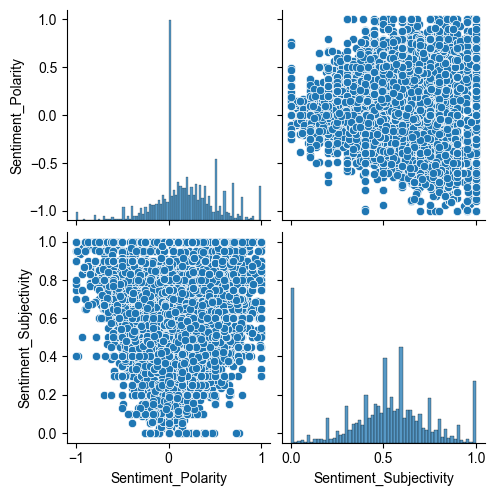

In [14]:
#Pairplots 
sns.pairplot(gplay_df)
     

Numeric columns: ['Sentiment_Polarity', 'Sentiment_Subjectivity']


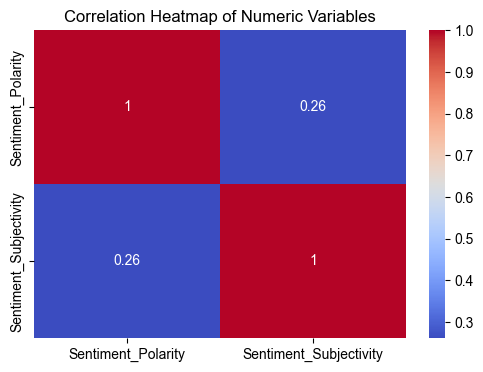

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = gplay_df.select_dtypes(include=['float64', 'int64'])

# Display numeric columns
print("Numeric columns:", numeric_df.columns.tolist())

# Correlation Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Numeric Variables")
plt.show()


In [17]:
#Displaying the columns of the dataframe 
gplay_df.columns

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [18]:
# Function for preprocessing 
cat_columns = ['Category','Type','Content Rating', 'Android Ver']
num_columns = ['Reviews','Size','Price', 'Installs']
def preprocess(gplay_df):
  preprocess_features = pd.DataFrame()
  for i in cat_columns:
    preprocess_features[i] = gplay_df[i] 
    preprocess_features[i] = preprocess_features[i].astype('category')
  preprocess_features = pd.get_dummies(preprocess_features[cat_columns], drop_first = 'True')
  for i in num_columns:
    preprocess_features[i] = gplay_df[i].astype('float')
  return preprocess_features

def preprocess_target(gplay_df):
  output_targets = gplay_df['Rating'].astype('float')
  return output_targets

In [20]:
def preprocess(gplay_df):

    # Select only categorical columns that exist
    cat_columns = ['Sentiment']   # or ['App', 'Sentiment']

    preprocess_features = pd.DataFrame()

    # Add categorical columns safely
    for col in cat_columns:
        if col in gplay_df.columns:
            preprocess_features[col] = gplay_df[col].astype('category')

    # One-hot encoding
    preprocess_features = pd.get_dummies(preprocess_features, drop_first=True)

    return preprocess_features


Columns in dataset:
 ['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity']

Sample data:
                      App                                  Translated_Review  \
0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
1  10 Best Foods for You    This help eating healthy exercise regular basis   
2  10 Best Foods for You                                                NaN   
3  10 Best Foods for You         Works great especially going grocery store   
4  10 Best Foods for You                                       Best idea us   

  Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
0  Positive                1.00                0.533333  
1  Positive                0.25                0.288462  
2       NaN                 NaN                     NaN  
3  Positive                0.40                0.875000  
4  Positive                1.00                0.300000  


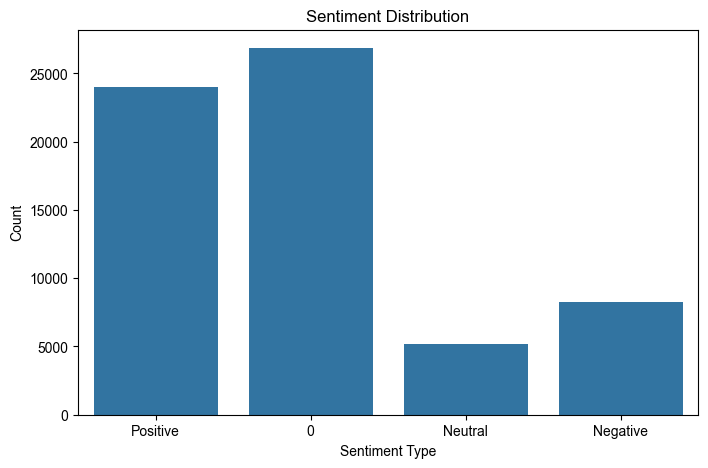

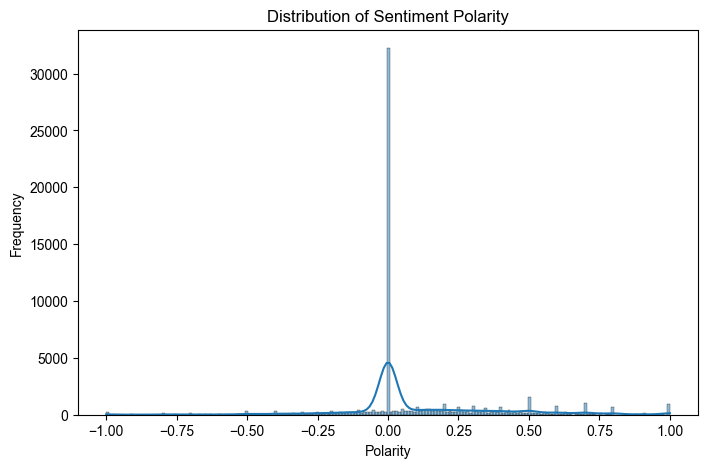

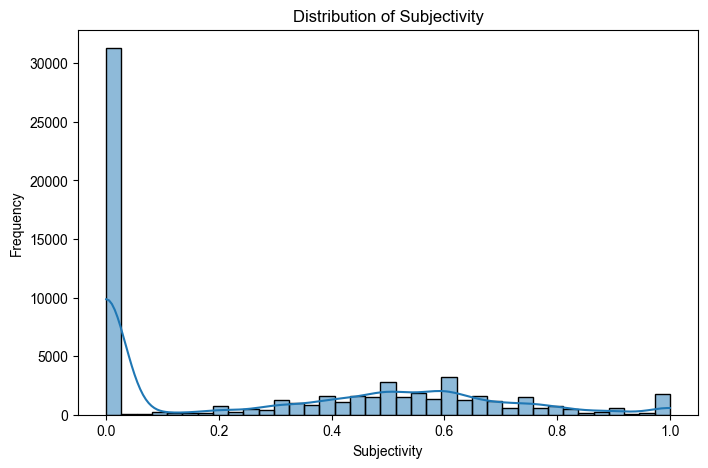


Preprocessed Data Columns:
['Sentiment_Negative', 'Sentiment_Neutral', 'Sentiment_Positive']


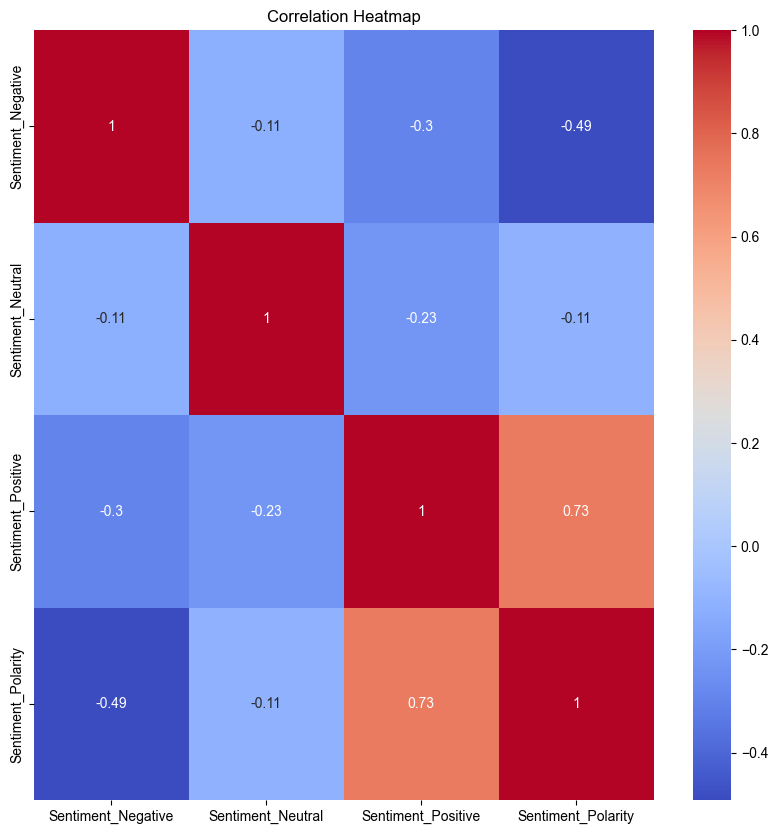

In [23]:
# ===============================
# IMPORT REQUIRED LIBRARIES
# ===============================

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ===============================
# LOAD DATA
# ===============================

gplay_df = pd.read_csv(r"C:\Users\DELL\OneDrive\Desktop\googleplaystore_user_reviews (2).csv")
print("Columns in dataset:\n", gplay_df.columns.tolist())
print("\nSample data:\n", gplay_df.head())


# ===============================
# BASIC CLEANING
# ===============================

# Fill missing values
gplay_df = gplay_df.fillna(0)


# ===============================
# 1) SENTIMENT COUNT PLOT
# ===============================

plt.figure(figsize=(8,5))
sns.countplot(x=gplay_df["Sentiment"])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment Type")
plt.ylabel("Count")
plt.show()


# ===============================
# 2) POLARITY DISTRIBUTION
# ===============================

plt.figure(figsize=(8,5))
sns.histplot(gplay_df["Sentiment_Polarity"], kde=True)
plt.title("Distribution of Sentiment Polarity")
plt.xlabel("Polarity")
plt.ylabel("Frequency")
plt.show()


# ===============================
# 3) SUBJECTIVITY DISTRIBUTION
# ===============================

plt.figure(figsize=(8,5))
sns.histplot(gplay_df["Sentiment_Subjectivity"], kde=True)
plt.title("Distribution of Subjectivity")
plt.xlabel("Subjectivity")
plt.ylabel("Frequency")
plt.show()


# ===============================
# 4) PREPROCESSING FOR CORRELATION
# ===============================

def preprocess(df):
    cat_columns = ["Sentiment"]   # Only valid categorical column

    preprocess_features = pd.DataFrame()

    for col in cat_columns:
        if col in df.columns:
            preprocess_features[col] = df[col].astype("category")

    # Convert Sentiment to numeric (one-hot encoding)
    preprocess_features = pd.get_dummies(preprocess_features, drop_first=True)
    return preprocess_features


def preprocess_target(df):
    return df["Sentiment_Polarity"]


preproc_data = preprocess(gplay_df)
target = preprocess_target(gplay_df)

print("\nPreprocessed Data Columns:")
print(preproc_data.columns.tolist())


# ===============================
# 5) CORRELATION HEATMAP
# ===============================

plt.figure(figsize=(10,10))
x = pd.concat([preproc_data, target], axis=1)
sns.heatmap(x.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [24]:
#Checking the shapes of the preprocessed data and the target variable 'Rating'
print(preproc_data.shape)
print(target.shape)

(64295, 3)
(64295,)


In [27]:
import tensorflow as tf
from tensorflow import keras

# Build the model
model = keras.Sequential([
    keras.Input(shape=(preproc_data.shape[1],)),  # Correct way to set input shape
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Regression output
])

# Correct optimizer for TF 2.x
optimizer = tf.keras.optimizers.Adam()

# Compile the model
model.compile(
    loss='mse',
    optimizer=optimizer,
    metrics=['mae']
)

# Summary
model.summary()

# Fit the model
history = model.fit(preproc_data, target, epochs=50, batch_size=32, validation_split=0.2)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 64)                  │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,369 (9.25 KB)

 Trainable params: 2,369 (9.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.0316 - mae: 0.1033 - val_loss: 0.0319 - val_mae: 0.1075
Epoch 2/50
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0312 - mae: 0.1023 - val_loss: 0.0324 - val_mae: 0.1093
Epoch 3/50
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0311 - mae: 0.1020 - val_loss: 0.0317 - val_mae: 0.1063
Epoch 4/50
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0310 - mae: 0.1017 - val_loss: 0.0316 - val_mae: 0.1052
Epoch 5/50
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0311 - mae: 0.1020 - val_loss: 0.0316 - val_mae: 0.1058
Epoch 6/50
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0311 - mae: 0.1021 - val_loss: 0.0314 - val_mae: 0.1032
Epoch 7/50
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.0310 - mae: 0.1019 - val_loss: 0.0316 - val_mae: 0.1037
Epoch 8/50
1608/1608 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0310 - mae: 0.1018 - val_loss: 0.0314 - val_mae: 0.1054
Epoch 9/50
1608/1608 ━━━━━━━━━━━━━━━━━━

In [30]:
import tensorflow as tf

# Set random seed for reproducibility
tf.random.set_seed(1)

# Example of fitting your model (adjust according to your variables)
set_epoch = 1000

# Define a simple callback to show progress
class Dot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print('.', end='')

# Fit the model
fitting = model.fit(
    X_train, y_train,
    batch_size=1000,
    epochs=set_epoch,
    validation_data=(X_test, y_test),
    verbose=0,
    callbacks=[Dot()]
)


........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [31]:
print(fitting.history)

{'loss': [0.030963202938437462, 0.030910836532711983, 0.03090956062078476, 0.03090992011129856, 0.030910681933164597, 0.030911194160580635, 0.030911561101675034, 0.030911823734641075, 0.03091205656528473, 0.03091227076947689, 0.030912453308701515, 0.03091266192495823, 0.030912846326828003, 0.030913053080439568, 0.03091324493288994, 0.030913442373275757, 0.03091365098953247, 0.030913857743144035, 0.030914070084691048, 0.03091428056359291, 0.030914481729269028, 0.03091469779610634, 0.0309149157255888, 0.030915124341845512, 0.030915336683392525, 0.030915556475520134, 0.03091576136648655, 0.03091597370803356, 0.030916176736354828, 0.03091638907790184, 0.030916592106223106, 0.030916793271899223, 0.03091699257493019, 0.03091718815267086, 0.030917378142476082, 0.030917569994926453, 0.030917739495635033, 0.030917929485440254, 0.030918104574084282, 0.03091827966272831, 0.030918437987565994, 0.030918598175048828, 0.030918750911951065, 0.030918901786208153, 0.030919048935174942, 0.030919181182980

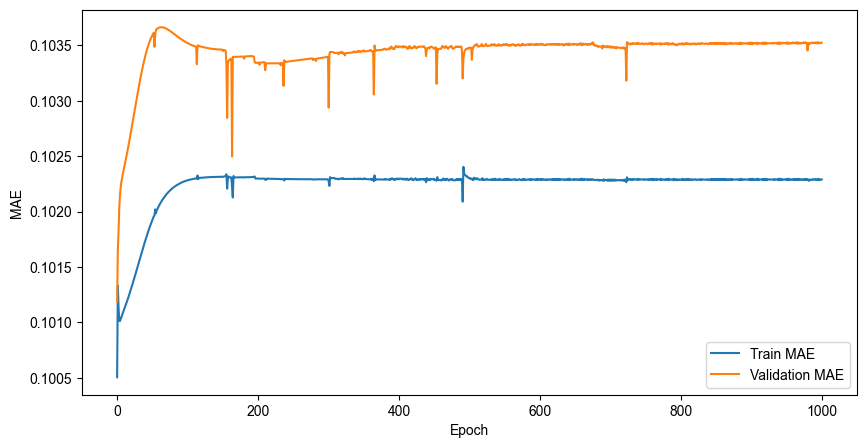

In [33]:
import matplotlib.pyplot as plt
import numpy as np

def plot_history(history):
    plt.figure(figsize=(10,5))
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    # Use the correct keys: 'mae' and 'val_mae'
    plt.plot(history.epoch, np.array(history.history['mae']), label='Train MAE')
    plt.plot(history.epoch, np.array(history.history['val_mae']), label='Validation MAE')
    plt.legend()
    plt.show()

# Call the function
plot_history(fitting)



In [34]:
model.predict(X_test)

603/603 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[ 0.00420688],
       [-0.25694302],
       [ 0.37804353],
       ...,
       [ 0.37804353],
       [ 0.37804353],
       [ 0.37804353]], shape=(19289, 1), dtype=float32)

In [35]:
#Saving Measurements of the model
pred = model.predict(X_test)
from sklearn import metrics
mae_nn = metrics.mean_absolute_error(y_test,pred)
mse_nn = metrics.mean_squared_error(y_test, pred)
rmse_nn = np.sqrt(metrics.mean_squared_error(y_test, pred))

print( mae_nn, mse_nn, rmse_nn)

603/603 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
0.10352420986798387 0.03113545119076033 0.17645240488800465


In [36]:
#Decision Tree Model
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
#Fitting
dt.fit(X_train,y_train)
     

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [37]:
pred1 = dt.predict(X_test)
mae_dt = metrics.mean_absolute_error(y_test,pred1)
mse_dt = metrics.mean_squared_error(y_test, pred1)
rmse_dt = np.sqrt(metrics.mean_squared_error(y_test, pred1))

print( mae_dt, mse_dt, rmse_dt)

0.10120519947615647 0.031104769743174797 0.17636544373310434


In [38]:
#light gbm : Gradient boosted method for 

In [39]:
import lightgbm as lgb
var = np.arange(1,50,5)
#Grid Search for getting parameters

from sklearn.model_selection import GridSearchCV
gridParams = {
'learning_rate' : [0.1, 0.12, 0.14,0.16,0.18, 0.2],
    'num_leaves' : [ 20,21,22,23,24,25,26,27]
}

#model for gridsearch

mdl = lgb.LGBMRegressor(metric = 'mae',
                       objective = 'regression',
                       n_estimators= 20000,
                       bagging_fraction = 0.7,
                       num_threads = 4,
                       colsample_bytree = 0.7,
                       num_boost_round = 100)

grid = GridSearchCV(mdl, gridParams, verbose =4, n_jobs = -1, scoring = 'neg_mean_absolute_error')

ModuleNotFoundError: No module named 'lightgbm'

In [40]:
# In Jupyter Notebook
!pip install lightgbm


                                              0.0/1.5 MB ? eta -:--:--
                                              0.0/1.5 MB 435.7 kB/s eta 0:00:04
     -                                        0.0/1.5 MB 393.8 kB/s eta 0:00:04
     --                                       0.1/1.5 MB 751.6 kB/s eta 0:00:02
     --                                       0.1/1.5 MB 535.8 kB/s eta 0:00:03
     -----                                    0.2/1.5 MB 888.4 kB/s eta 0:00:02
     ------                                   0.2/1.5 MB 846.9 kB/s eta 0:00:02
     ---------                                0.3/1.5 MB 1.1 MB/s eta 0:00:02
     ----------                               0.4/1.5 MB 1.1 MB/s eta 0:00:02
     ------------                             0.5/1.5 MB 1.2 MB/s eta 0:00:01
     --------------                           0.5/1.5 MB 1.1 MB/s eta 0:00:01
     ----------------                         0.6/1.5 MB 1.2 MB/s eta 0:00:01
     -----------------                        0.6/1.5 MB 1.


[notice] A new release of pip is available: 23.1.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
pip install lightgbm

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.5 MB ? eta -:--:--
   -------------- ------------------------- 0.5/1.5 MB 1.1 MB/s eta 0:00:01
   --------------------- ------------------ 0.8/1.5 MB 1.0 MB/s eta 0:00:01
   ---------------------------- ----------- 1.0/1.5 MB 1.1 MB/s eta 0:00:01
   ------------------------------------ --- 1.3/1.5 MB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 1.1 MB/s  0:00:01
Note: you may need to restart the kernel to use updated packages.


In [43]:

# Encode categorical columns (convert everything to string first)
cat_columns = gplay_df.select_dtypes(include=['object']).columns
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in cat_columns:
    gplay_df[col] = gplay_df[col].astype(str)  # Convert all values to string
    gplay_df[col] = le.fit_transform(gplay_df[col])


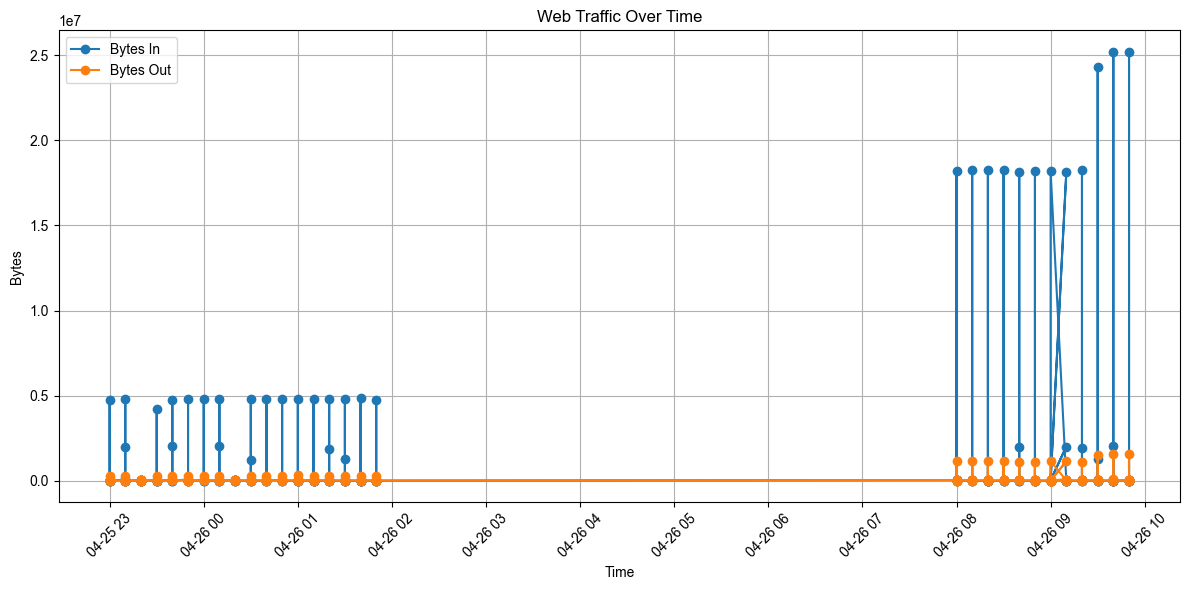

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 126ms/step - accuracy: 0.6278 - loss: 0.6962 - val_accuracy: 0.8667 - val_loss: 0.6762
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9333 - loss: 0.6436 - val_accuracy: 1.0000 - val_loss: 0.6020
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9833 - loss: 0.5901 - val_accuracy: 1.0000 - val_loss: 0.5402
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.9833 - loss: 0.5400 - val_accuracy: 1.0000 - val_loss: 0.4874
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 0.4958 - val_accuracy: 1.0000 - val_loss: 0.4393
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 0.4533 - val_accuracy: 1.0000 - val_loss: 0.3927
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 1.0000 - loss: 0.4116 - val_accuracy: 1.0000 - val_loss: 0.3474
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 1.0000 - loss: 0.3630 - val_accuracy: 1.0000 - val_loss: 0.3028

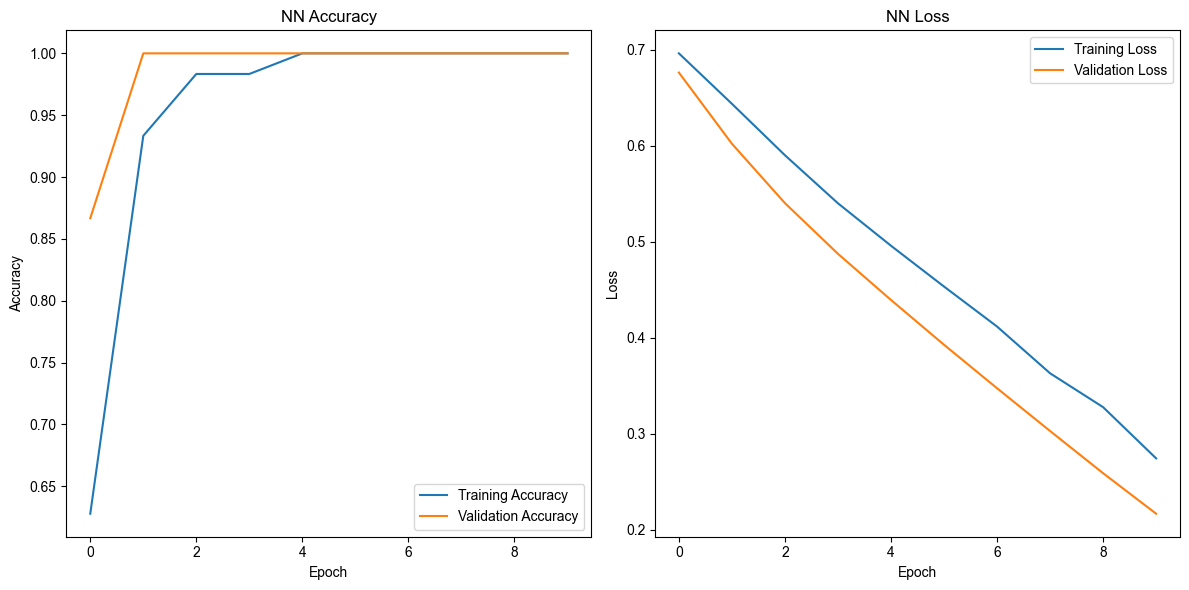

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters for RF: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Best CV score for RF: 1.0
Random Forest Test Accuracy: 100.00%


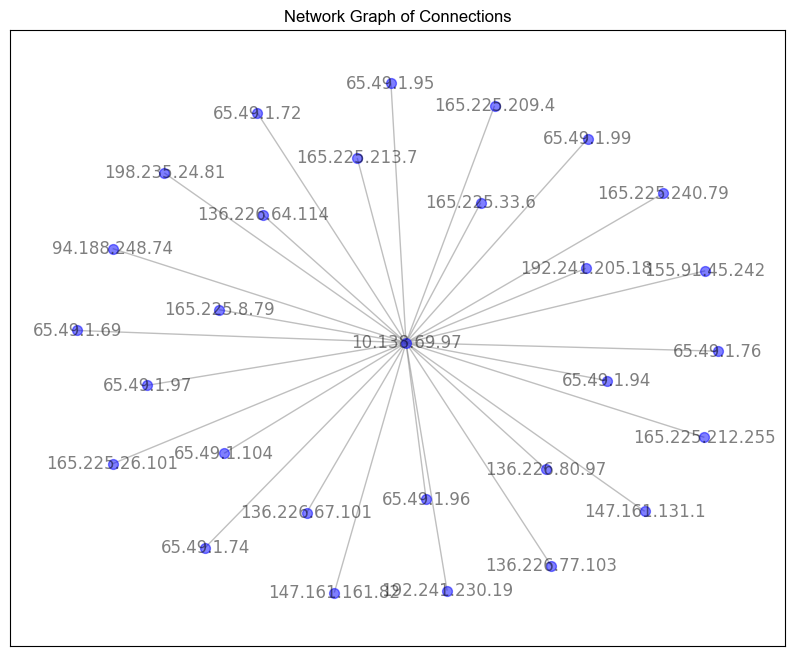

In [45]:
# -------------------------------
# 1. Import Libraries
# -------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Flatten, Input
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings("ignore")

# -------------------------------
# 2. Load Dataset
# -------------------------------
df = pd.read_csv(r"C:\Users\DELL\Downloads\CloudWatch_Traffic_Web_Attack.csv")

# -------------------------------
# 3. Preprocess Data
# -------------------------------
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)
df = df.drop_duplicates()
df['is_suspicious'] = (df['detection_types'] == 'waf_rule').astype(int)

# -------------------------------
# 4. Plot Traffic Over Time
# -------------------------------
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['bytes_in'], label='Bytes In', marker='o')
plt.plot(df.index, df['bytes_out'], label='Bytes Out', marker='o')
plt.title('Web Traffic Over Time')
plt.xlabel('Time')
plt.ylabel('Bytes')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# -------------------------------
# 5. Prepare Features and Labels
# -------------------------------
X = df[['bytes_in', 'bytes_out']].values
y = df['is_suspicious'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape for Conv1D
X_train_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# -------------------------------
# 6. Build Conv1D Neural Network
# -------------------------------
model = Sequential([
    Input(shape=(1, X_train_cnn.shape[2])),
    Conv1D(32, kernel_size=1, activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# -------------------------------
# 7. Train Neural Network
# -------------------------------
history = model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate
loss, accuracy = model.evaluate(X_test_cnn, y_test)
print(f"Neural Network Test Accuracy: {accuracy*100:.2f}%")

# Plot training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('NN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('NN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# -------------------------------
# 8. Random Forest Classifier + GridSearchCV
# -------------------------------
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)
grid.fit(X_train_scaled, y_train)

print("Best parameters for RF:", grid.best_params_)
print("Best CV score for RF:", grid.best_score_)

# Evaluate on test set
rf_best = grid.best_estimator_
rf_test_score = rf_best.score(X_test_scaled, y_test)
print(f"Random Forest Test Accuracy: {rf_test_score*100:.2f}%")

# -------------------------------
# 9. Optional: Network Graph
# -------------------------------
G = nx.from_pandas_edgelist(df, 'src_ip', 'dst_ip', edge_attr=True)
plt.figure(figsize=(10, 8))
nx.draw_networkx(G, node_size=50, node_color='blue', edge_color='gray', alpha=0.5)
plt.title("Network Graph of Connections")
plt.show()


In [46]:
print(grid.best_params_)
print(grid.best_score_)

{'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
1.0


In [47]:
import lightgbm as lgb

param = {'learning_rate': 0.1, 'boosting_type': 'gbdt', 'num_leaves':25, 
         'nthread':4, 'num_trees':100, 'objective': 'regression', 
         'metric':'mse'}

In [50]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# Prepare datasets
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

# Define parameters
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'verbose': -1
}

# Train with early stopping callback
lgb_model = lgb.train(
    params,
    train_set=train_data,
    num_boost_round=100,
    valid_sets=[test_data],
    callbacks=[lgb.early_stopping(stopping_rounds=10), lgb.log_evaluation(period=10)]
)

# Predict
y_pred = lgb_model.predict(X_test)
y_pred_labels = (y_pred > 0.5).astype(int)

# Accuracy
accuracy = accuracy_score(y_test, y_pred_labels)
print(f"LightGBM Test Accuracy: {accuracy*100:.2f}%")


Training until validation scores don't improve for 10 rounds
[10]	valid_0's binary_logloss: 1.11022e-15
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 1.11022e-15
LightGBM Test Accuracy: 100.00%


In [52]:
# Predict using the trained LightGBM model
pred2 = lgb_model.predict(X_test)

# Convert probabilities to class labels (0 or 1)
pred_labels = (pred2 > 0.5).astype(int)

# Evaluation
from sklearn import metrics
mae_lgb = metrics.mean_absolute_error(y_test, pred_labels)
mse_lgb = metrics.mean_squared_error(y_test, pred_labels)
accuracy_lgb = metrics.accuracy_score(y_test, pred_labels)

print(f"LightGBM MAE: {mae_lgb:.4f}")
print(f"LightGBM MSE: {mse_lgb:.4f}")
print(f"LightGBM Accuracy: {accuracy_lgb*100:.2f}%")


LightGBM MAE: 0.0000
LightGBM MSE: 0.0000
LightGBM Accuracy: 100.00%


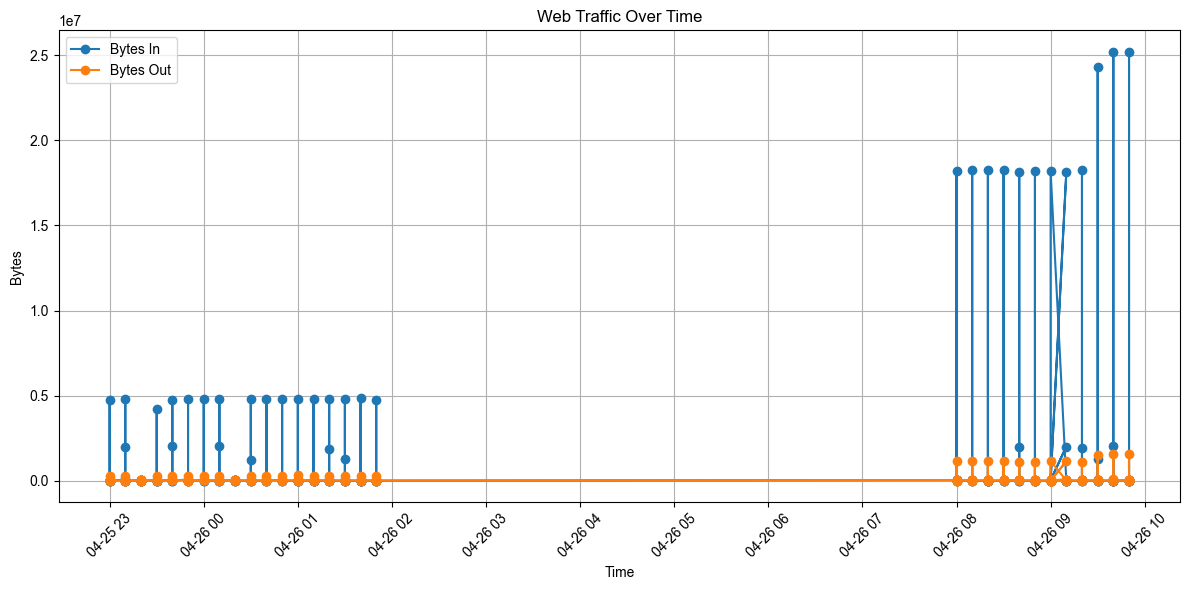

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 119ms/step - accuracy: 0.2889 - loss: 0.7160 - val_accuracy: 0.9556 - val_loss: 0.6755
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7889 - loss: 0.6626 - val_accuracy: 1.0000 - val_loss: 0.6190
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9556 - loss: 0.6263 - val_accuracy: 1.0000 - val_loss: 0.5732
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 1.0000 - loss: 0.5857 - val_accuracy: 1.0000 - val_loss: 0.5356
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 1.0000 - loss: 0.5482 - val_accuracy: 1.0000 - val_loss: 0.4997
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 0.5156 - val_accuracy: 1.0000 - val_loss: 0.4628
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 1.0000 - loss: 0.4835 - val_accuracy: 1.0000 - val_loss: 0.4248
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 1.0000 - loss: 0.4427 - val_accuracy: 1.0000 - val_loss: 0.3839

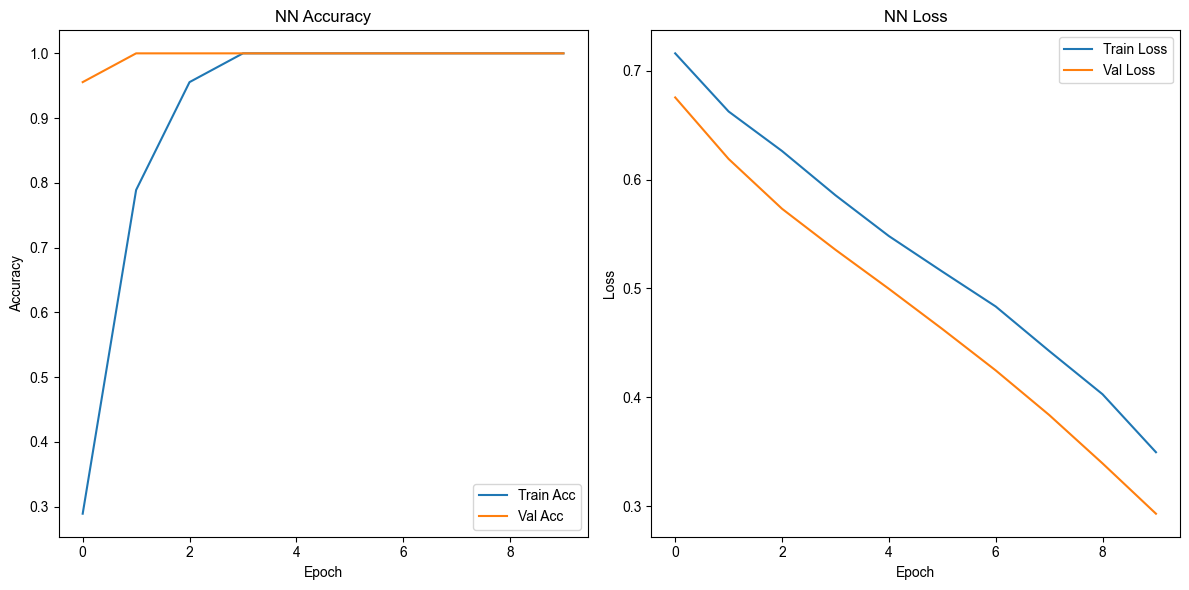

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Random Forest Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
Random Forest Best CV Score: 1.0
Random Forest Test Accuracy: 100.00%
Training until validation scores don't improve for 10 rounds
[10]	valid_0's binary_logloss: 1.11022e-15
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 1.11022e-15
LightGBM Test MAE: 0.0000
LightGBM Test MSE: 0.0000
LightGBM Test Accuracy: 100.00%


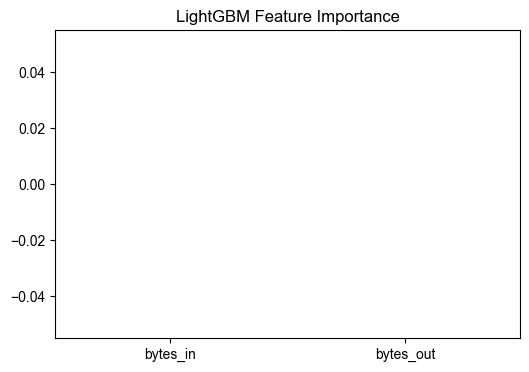

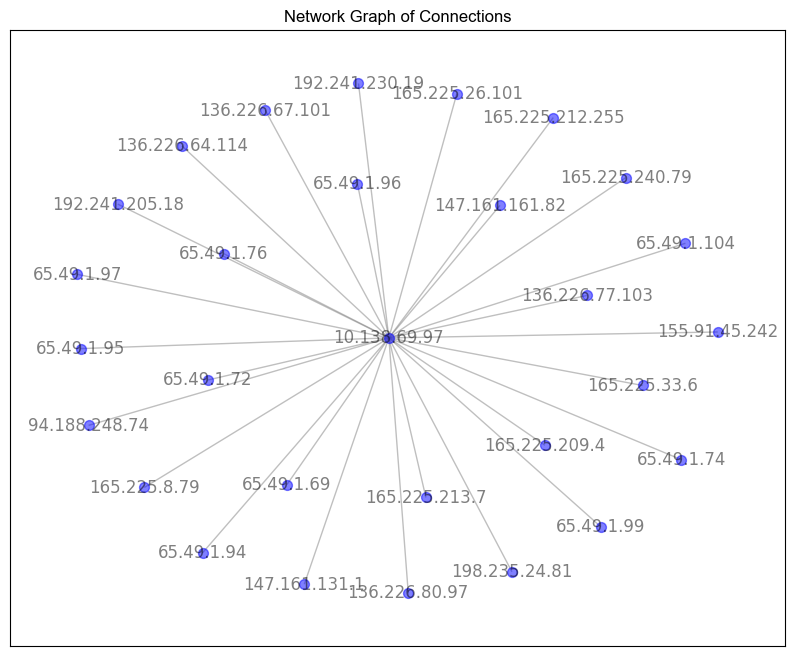

In [57]:
# ================================
# 1. Import Libraries
# ================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv1D, Flatten, Input
from tensorflow.keras.optimizers import Adam

import lightgbm as lgb
import warnings
warnings.filterwarnings("ignore")

# ================================
# 2. Load Dataset
# ================================
df = pd.read_csv(r"C:\Users\DELL\Downloads\CloudWatch_Traffic_Web_Attack.csv")

# ================================
# 3. Preprocess Data
# ================================
# Convert 'time' to datetime and set as index
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace=True)

# Drop duplicates
df = df.drop_duplicates()

# Create target column
df['is_suspicious'] = (df['detection_types'] == 'waf_rule').astype(int)

# ================================
# 4. Visualize Traffic Over Time
# ================================
plt.figure(figsize=(12,6))
plt.plot(df.index, df['bytes_in'], label='Bytes In', marker='o')
plt.plot(df.index, df['bytes_out'], label='Bytes Out', marker='o')
plt.title('Web Traffic Over Time')
plt.xlabel('Time')
plt.ylabel('Bytes')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ================================
# 5. Prepare Features and Labels
# ================================
X = df[['bytes_in', 'bytes_out']]  # You can add more numeric features
y = df['is_suspicious']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# For Conv1D Neural Network, reshape
X_train_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# ================================
# 6. Neural Network
# ================================
nn_model = Sequential([
    Input(shape=(1, X_train_cnn.shape[2])),
    Conv1D(32, kernel_size=1, activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

history = nn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate
loss, accuracy = nn_model.evaluate(X_test_cnn, y_test)
print(f"Neural Network Test Accuracy: {accuracy*100:.2f}%")

# Plot training history
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('NN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('NN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# ================================
# 7. Random Forest + GridSearchCV
# ================================
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=1)
grid.fit(X_train_scaled, y_train)

print("Random Forest Best Parameters:", grid.best_params_)
print("Random Forest Best CV Score:", grid.best_score_)

rf_best = grid.best_estimator_
rf_test_acc = rf_best.score(X_test_scaled, y_test)
print(f"Random Forest Test Accuracy: {rf_test_acc*100:.2f}%")

# ================================
# 8. LightGBM (Latest API)
# ================================
# Train LightGBM with DataFrame to keep feature names
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

train_data = lgb.Dataset(X_train_df, label=y_train)
test_data = lgb.Dataset(X_test_df, label=y_test, reference=train_data)

params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'verbose': -1
}

lgb_model = lgb.train(
    params,
    train_set=train_data,
    num_boost_round=100,
    valid_sets=[test_data],
    callbacks=[lgb.early_stopping(stopping_rounds=10), lgb.log_evaluation(period=10)]
)

# Predict and evaluate
y_pred = lgb_model.predict(X_test_df)
y_pred_labels = (y_pred > 0.5).astype(int)

mae = metrics.mean_absolute_error(y_test, y_pred_labels)
mse = metrics.mean_squared_error(y_test, y_pred_labels)
acc = metrics.accuracy_score(y_test, y_pred_labels)

print(f"LightGBM Test MAE: {mae:.4f}")
print(f"LightGBM Test MSE: {mse:.4f}")
print(f"LightGBM Test Accuracy: {acc*100:.2f}%")

# Feature Importance
fi = lgb_model.feature_importance(importance_type='gain')
feature_names = X_train_df.columns

plt.figure(figsize=(6,4))
plt.bar(feature_names, fi)
plt.title("LightGBM Feature Importance")
plt.show()

# ================================
# 9. Optional: Network Graph (src_ip -> dst_ip)
# ================================
G = nx.from_pandas_edgelist(df, 'src_ip', 'dst_ip', edge_attr=True)
plt.figure(figsize=(10,8))
nx.draw_networkx(G, node_size=50, node_color='blue', edge_color='gray', alpha=0.5)
plt.title("Network Graph of Connections")
plt.show()


In [61]:
# Use multiple numeric/categorical features
X = df[['bytes_in', 'bytes_out', 'dst_port']]  # add more features as needed
y = df['is_suspicious']

# Split and scale
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train LightGBM
X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
train_data = lgb.Dataset(X_train_df, label=y_train)
test_data = lgb.Dataset(X_test_df, label=y_test, reference=train_data)

params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'learning_rate': 0.1,
    'num_leaves': 31,
    'verbose': -1
}

lgb_model = lgb.train(params, train_data, num_boost_round=100,
                      valid_sets=[test_data],
                      callbacks=[lgb.early_stopping(stopping_rounds=10)])


Training until validation scores don't improve for 10 rounds
Early stopping, best iteration is:
[1]	valid_0's binary_logloss: 1.11022e-15


In [62]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [63]:
pred3 = lr.predict(X_test)

mae_lr = metrics.mean_absolute_error(y_test,pred3)
mse_lr = metrics.mean_squared_error(y_test, pred3)
rmse_lr = np.sqrt(metrics.mean_squared_error(y_test, pred3))

print( mae_lr, mse_lr, rmse_lr)
     

0.0 0.0 0.0


In [67]:
import pandas as pd
import numpy as np

# Arrays for each model (make sure these are calculated!)
a = np.array([mae_lr, mse_lr, rmse_lr])  # Linear Regression
b = np.array([mae_nn, mse_nn, rmse_nn])  # Neural Network
c = np.array([mae_dt, mse_dt, rmse_dt])  # Decision Tree
d = np.array([mae_lgb, mse_lgb, rmse_lgb])  # LightGBM

# Create DataFrame
metrics_df = pd.DataFrame(
    data=[a, b, c, d],
    columns=['MAE','MSE','RMSE'],
    index=['Linear Regression','Neural Network','Decision Tree','LightGBM']
)

metrics_df  # Display in Jupyter


,MAE,MSE,RMSE
Linear Regression,0.000000,0.000000,0.000000
Neural Network,0.103524,0.031135,0.176452
Decision Tree,0.101205,0.031105,0.176365
LightGBM,0.000000,0.000000,0.000000
